# Tutorial 5: RFE on the best 400 features

---

### Introduction

Hello, this notebook will show how to use RFE to perform further feature selection, as we found that most features are very highly correlated, therfore we would need to remove those using the tool that we mentioned above. 

first, let us call the data

In [1]:
%store -r df_input_RG
%store -r y_RG
%store -r df_RG

In [2]:
y_RG = y_RG.map({'S': 1, 'B': 0})

---

calling some packages

In [3]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Data splitting </i></b> 

In [4]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_RG, y_RG, test_size = 0.3, random_state=3, stratify=y_RG) # train and valid sets

In [5]:
print(Xtrain.shape)
print(Xtest.shape)

(393, 2074)
(169, 2074)


---

<b><i> get the best N features </i></b> 

In [6]:
%store -r featImp_RG

In [8]:
arrimp = np.array(featImp_RG).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])

[1316 1284 1093 1290   60 1034 1068 1029 1070 1107]


In [9]:
cols_ordered = df_input_RG.columns[sorted_idx][-400:]
cols_ordered

Index([1089.345, 1063.429,  962.734,  965.601,   914.19, 1076.231, 1250.068,
        960.238, 1267.175, 1047.108,
       ...
       1445.173, 1419.847, 1285.394, 1424.528,  850.046, 1248.864, 1269.657,
       1245.863, 1270.902, 1294.379],
      dtype='object', length=400)

---

In [10]:
Xtrain[cols_ordered]

1089.345  1063.429  962.734   965.601   914.190   1076.231  1250.068  \
379  1.028729  1.030634  1.004159  1.004502  1.044561  1.030239  0.965256   
206 -0.904164 -0.908347 -0.839096 -0.835209 -0.930014 -0.908296 -0.728967   
432  1.122145  1.130994  1.050363  1.048614  1.148173  1.129931  0.994477   
272  1.280480  1.276190  1.288912  1.291579  1.260572  1.280038  1.325512   
321  1.060025  1.059908  1.056354  1.054482  1.072937  1.060009  1.027649   
..        ...       ...       ...       ...       ...       ...       ...   
37  -0.878273 -0.876218 -0.884011 -0.882976 -0.881033 -0.876016 -0.877428   
352  0.864009  0.870660  0.805071  0.800712  0.901922  0.870764  0.692594   
451  0.741530  0.757715  0.693019  0.690487  0.804252  0.753378  0.535054   
416  1.049970  1.050386  1.017431  1.013633  1.065975  1.052346  0.962966   
553 -0.391927 -0.390098 -0.400283 -0.397292 -0.383404 -0.391727 -0.349742   

     960.238   1267.175  1047.108  ...  1445.173  1419.847  1285.394  \
379  1.005951  0.966981  1.025428  ...  0.796700  0.816613  0.965266   
206 -0.843634 -0.730239 -0.900330  ... -0.452495 -0.447041 -0.722030   
432  1.052448  0.996704  1.121994  ...  0.855384  0.838502  0.989786   
272  1.288275  1.326231  1.275333  ...  1.492504  1.506321  1.333299   
321  1.052442  1.026796  1.056701  ...  0.808170  0.834994  1.028176   
..        ...       ...       ...  ...       ...       ...       ...   
37  -0.883691 -0.876172 -0.877518  ... -0.636559 -0.647769 -0.874418   
352  0.808347  0.693379  0.863362  ...  0.045670  0.052283  0.684628   
451  0.697061  0.537864  0.755628  ... -0.668446 -0.633230  0.522034   
416  1.015219  0.965401  1.044772  ...  0.672878  0.677292  0.960809   
553 -0.395626 -0.357279 -0.383171  ... -0.401382 -0.411641 -0.365488   

     1424.528  850.046   1248.864  1269.657  1245.863  1270.902  1294.379  
379  0.808167  1.052470  0.965650  0.966705  0.965603  0.966063  0.963941  
206 -0.446465 -0.930544 -0.728422 -0.730134 -0.727560 -0.729684 -0.712608  
432  0.843569  1.155776  0.994813  0.996318  0.993234  0.996334  0.982111  
272  1.500297  1.245707  1.325703  1.327618  1.325240  1.327287  1.338556  
321  0.824187  1.085934  1.028247  1.027980  1.027653  1.028410  1.026382  
..        ...       ...       ...       ...       ...       ...       ...  
37  -0.641312 -0.892337 -0.877430 -0.875470 -0.877618 -0.875385 -0.872381  
352  0.046264  0.929434  0.692055  0.693880  0.691212  0.693527  0.671506  
451 -0.647791  0.844424  0.535109  0.536361  0.532918  0.535635  0.504907  
416  0.673813  1.069079  0.963161  0.964591  0.962735  0.964783  0.955840  
553 -0.409608 -0.349449 -0.350147 -0.358474 -0.349862 -0.359121 -0.370484  

[393 rows x 400 columns]

### RFE

In [11]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression

In [ ]:

def get_models():
    models = dict()
    for i in range(2, 51):
        rfe = RFE(estimator=LogisticRegression(solver = 'newton-cg'), n_features_to_select=i, verbose = 0)
        model = LogisticRegression(solver = 'newton-cg')
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=50, random_state=1)
    # cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, Xtrain[cols_ordered[-400:]].values, Ytrain)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    


>2 0.681 (0.081)
>3 0.680 (0.081)
>4 0.675 (0.079)
>5 0.674 (0.079)
>6 0.692 (0.079)
>7 0.698 (0.079)
>8 0.738 (0.065)
>9 0.738 (0.064)
>10 0.739 (0.065)
>11 0.739 (0.065)


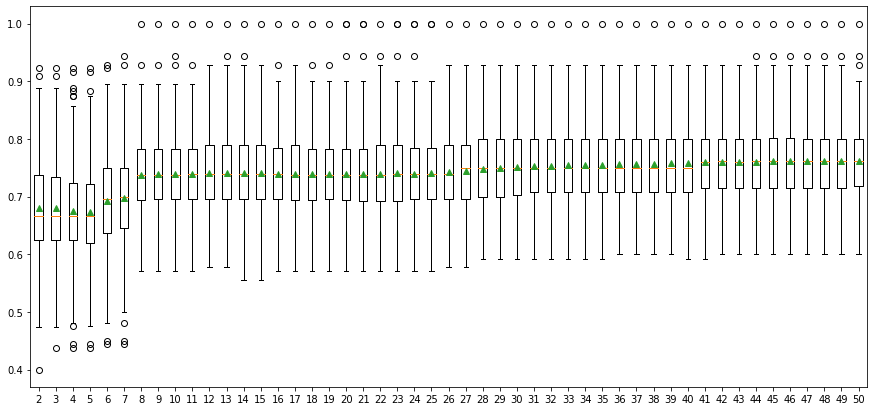

In [15]:
# plot model performance for comparison
plt.figure(figsize=(15, 7))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
print(1)

In [ ]:
[8,7], [1,7,8], [1,2,7,8]